---

# An interesting question is: what do separate dynamically trained filters see?

---

---

# We can visualise the effects of the Conv2D filtering inflicted upon inputs

---

---

# The result will be a set of pictures:

## 1. Obtained upon the action of all the convolutional filters on a given cat photo

## 2. Representig the specific activation pattern the given receptive field is sensitive to

---

---

# We will use our CNN model trained before

# Remark: the weight alone for this small model take circa 28 MB!

---

In [4]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

---

# We will process just a single image of a cat entity

# We first need to transform the 'jpg' image into a tensor

---

In [16]:
img_path = '/Users/g0d/dev/data/DL2018/cats_dogs_small/test/cats/cat.1700.jpg'

from keras.preprocessing import image

import numpy as np

img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /=255.

print(img_tensor.shape)

(1, 150, 150, 3)


---

# Let us display the picture tranformed to a tensor

---

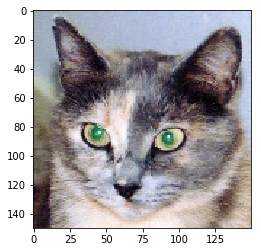

In [17]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.show()

---

# Next we build a "wrapper" model, whose role is to:

## 1. Contain some specific trained internal model

## 2. Accept inputs

## 2. Return multiple tensor output processed by the internal trained model

---

In [18]:
from keras import models 

layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

---

# We process out image with the wrapper model and collecty activation:

## It is just a standard predict() method called upon the input tensor containing the image

---

In [19]:
activations = activation_model.predict(img_tensor)

---

# Let us see how the first activation layer look like

# It is clearly a set of 32 feature layers of size 148x148 (WHY?)

# It is also a 4D tensor (1, 148, 148, 32)  (WHY?)

---

In [20]:
first_layer_activation = activations[0]

print(first_layer_activation.shape)

(1, 148, 148, 32)


---
# We can visualise an element of the output tensor, e.g. 14-th
---

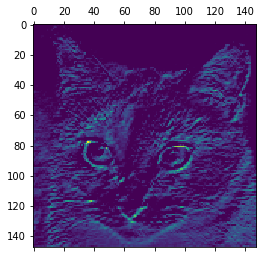

In [23]:
plt.matshow(first_layer_activation[0, :, :, 14], cmap='viridis')

---

# Let us visualise all the convolutrional filter outputs!

---

In [24]:
layer_names = []

for layer in model.layers[:8]:
    layer_names.append(layer.name)    

In [26]:
images_per_row = 16

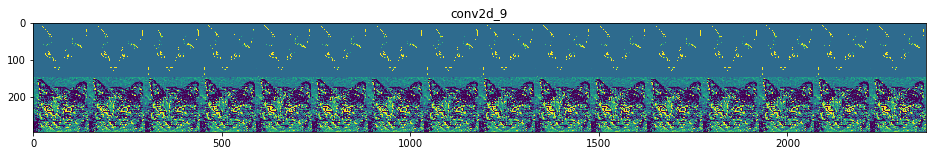

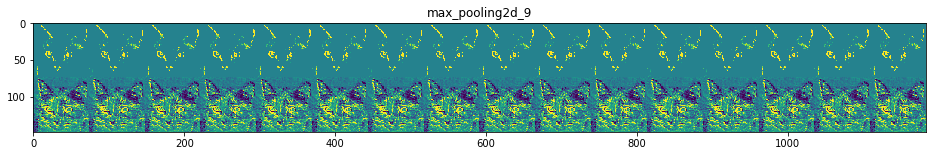

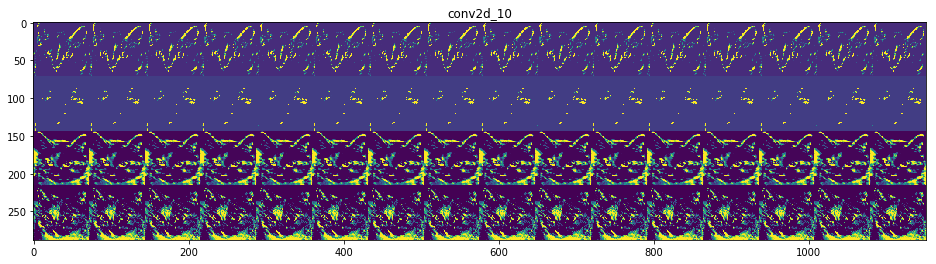

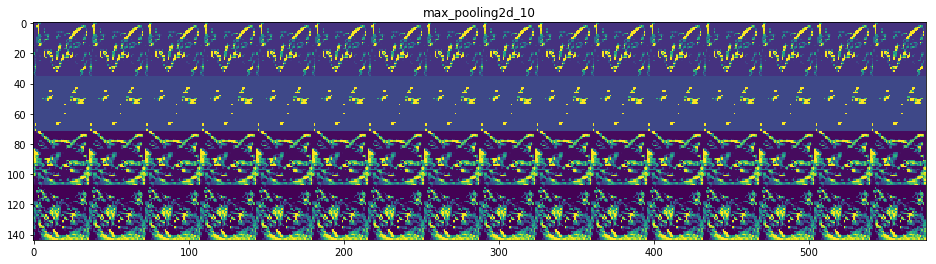

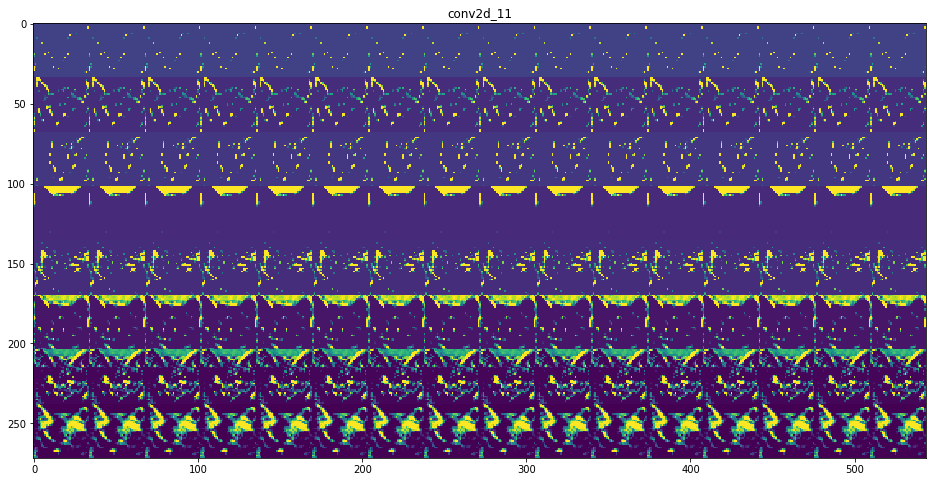

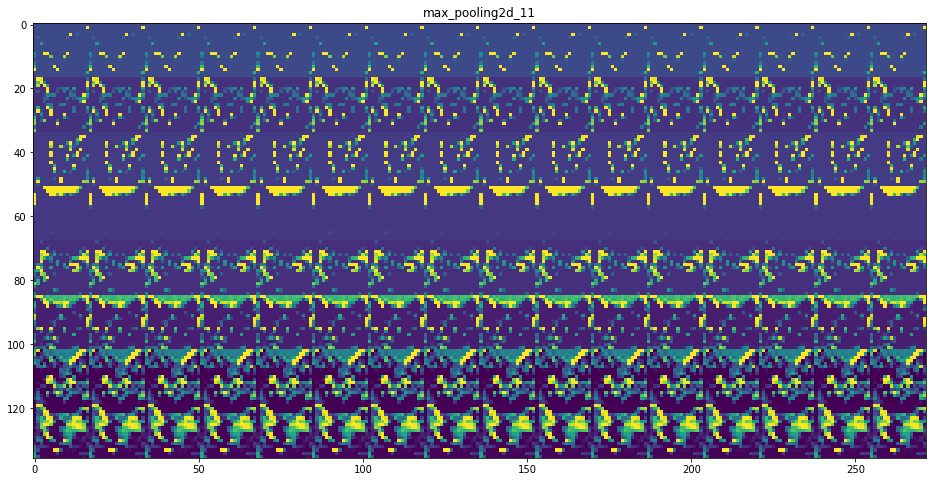

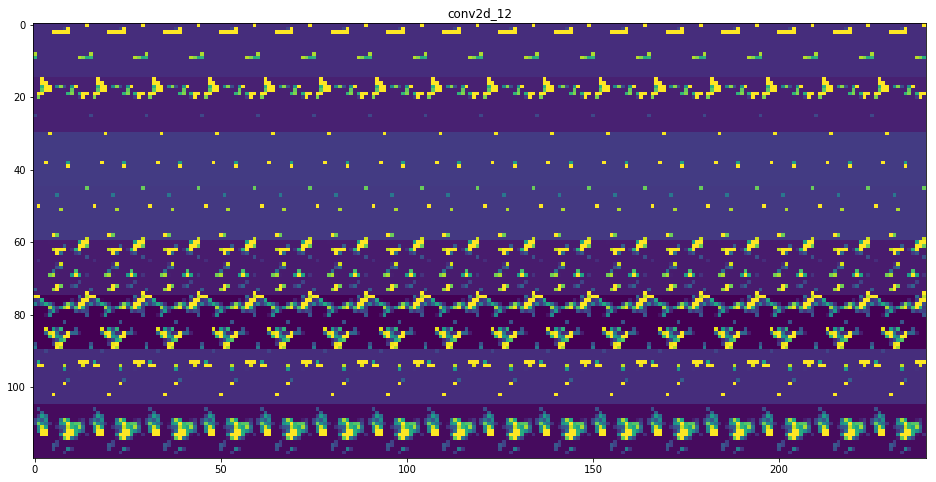

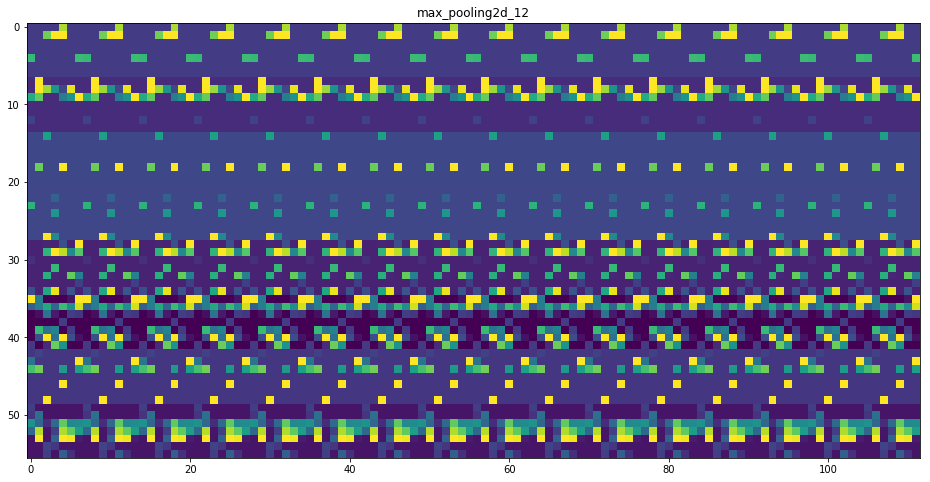

In [31]:
for layer_name, layer_activation in zip(layer_names, activations):
    
    n_features = layer_activation.shape[-1]
    
    size = layer_activation.shape[1]
    
    n_cols = n_features // images_per_row
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            
            channel_image = layer_activation[0, :, :, col * images_per_row]
            
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            
            display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image
            
    scale = 1. / size
    
    plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
    
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

---

# Observe how some deep images are sparesly activated

# WHY???

---